In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

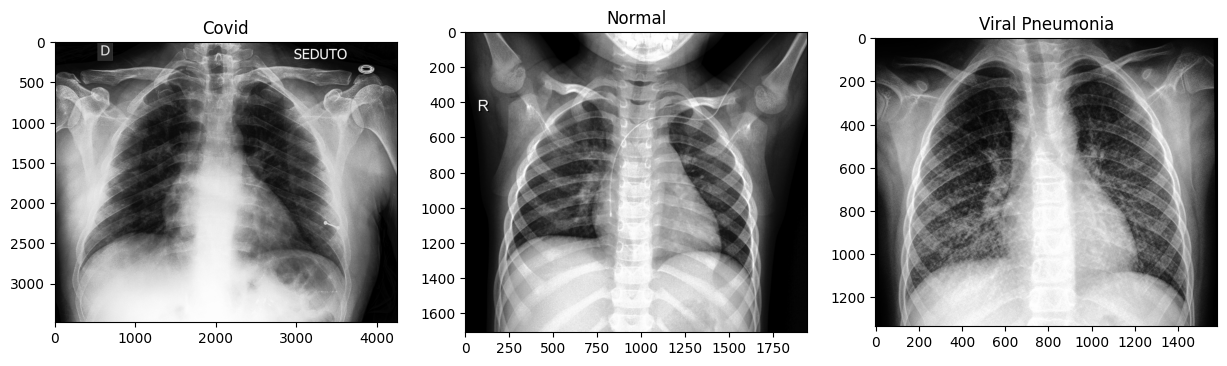

In [50]:
# first let's show the differences between our three classes
plt.figure(figsize = (15, 15))
covid_img   = cv2.imread('Covid19-dataset/train/Covid/01.jpeg')
normal_img  = cv2.imread('Covid19-dataset/train/Normal/01.jpeg')
vp_img      = cv2.imread('Covid19-dataset/train/Viral Pneumonia/01.jpeg')
plt.subplot(1, 3, 1)
plt.imshow(covid_img)
plt.title('Covid')
plt.subplot(1, 3, 2)
plt.imshow(normal_img)
plt.title('Normal')
plt.subplot(1, 3, 3)
plt.imshow(vp_img)
plt.title('Viral Pneumonia')
plt.show()

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2, VGG16, VGG19, ResNet50
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
# number of classes 
dir_list = sorted(os.listdir('Covid19-dataset/train'))
class_names_lst = [dir_name for dir_name in dir_list]
class_names_lst

['.DS_Store', 'Covid', 'Normal', 'Viral Pneumonia']

In [53]:
# let's load the data
img_generator = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.1
)
train_data = img_generator.flow_from_directory(
    'Covid19-dataset/train',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    subset = 'training'
)
valid_data = img_generator.flow_from_directory(
    'Covid19-dataset/train',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    subset = 'validation'
)
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)
test_data = test_generator.flow_from_directory(
    'Covid19-dataset/test',
    target_size = (255, 255),
    color_mode = 'rgb',
    classes = class_names_lst,
    class_mode = 'categorical',
    batch_size  = 64,
    shuffle = False
)

Found 226 images belonging to 4 classes.
Found 25 images belonging to 4 classes.
Found 66 images belonging to 4 classes.


In [54]:
base_model = ResNet50(input_shape=(255, 255, 3),
                      include_top=False,
                      weights="imagenet")
base2_model = MobileNetV2(input_shape=(255, 255, 3),
                          include_top=False,
                          weights="imagenet")
base3_model = VGG19(input_shape=(255, 255, 3),
                    include_top=False,
                    weights="imagenet")
base_model.trainable = False
base2_model.trainable = False
base3_model.trainable = True

In [55]:
len(base3_model.layers)

22

In [56]:
fine_tune = 20
for layer in base_model.layers[:fine_tune]:
    layer.trainable = False

In [57]:
early_stop=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [58]:
model = keras.Sequential([
    base3_model,
    layers.Flatten(),
    layers.Dense(4, activation = 'softmax')
])
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 4)                 100356    
                                                                 
Total params: 20,124,740
Trainable params: 20,124,740
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(
    train_data,
    epochs = 10,
    batch_size = 64,
    validation_data = valid_data,
    callbacks = [early_stop]
)

Epoch 1/10


2023-06-18 23:23:11.997555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - ETA: 0s - loss: 1.0430 - accuracy: 0.4513 

2023-06-18 23:25:40.356493: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 155s 33s/step - loss: 1.0430 - accuracy: 0.4513 - val_loss: 0.7014 - val_accuracy: 0.6000
Epoch 2/10
4/4 [==============================] - 153s 35s/step - loss: 0.6488 - accuracy: 0.7212 - val_loss: 0.5377 - val_accuracy: 0.7600
Epoch 3/10
4/4 [==============================] - 129s 31s/step - loss: 0.3596 - accuracy: 0.8496 - val_loss: 0.4452 - val_accuracy: 0.8400
Epoch 4/10
4/4 [==============================] - 128s 30s/step - loss: 0.1788 - accuracy: 0.9292 - val_loss: 0.3318 - val_accuracy: 0.8400
Epoch 5/10
4/4 [==============================] - 127s 30s/step - loss: 0.1269 - accuracy: 0.9469 - val_loss: 0.2473 - val_accuracy: 0.8800
Epoch 6/10
4/4 [==============================] - 129s 30s/step - loss: 0.1094 - accuracy: 0.9735 - val_loss: 0.2053 - val_accuracy: 0.8000
Epoch 7/10
4/4 [==============================] - 130s 30s/step - loss: 0.0836 - accuracy: 0.9779 - val_loss: 0.4495 - val_accuracy: 0.8000
Epoch 8/10
4/4 [===============

In [60]:
y_hat = model.predict(test_data)

2023-06-18 23:45:49.142250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 11s 319ms/step


In [61]:
y_hat_lst = []
for idx in range(y_hat.shape[0]):
    y_hat_lst.append(np.argmax(y_hat[idx]))

In [62]:
y_hat_cat = []
for val in y_hat_lst:
    y_hat_cat.append(class_names_lst[val])

In [63]:
true_y_cat = []
for val in test_data.classes:
    true_y_cat.append(class_names_lst[val])

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(test_data.classes, y_hat_lst)

0.9242424242424242

In [65]:
for i, j in zip(true_y_cat, y_hat_cat):
    print(i, '|', j)

Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Normal
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Normal
Viral Pneumonia | Viral Pneu

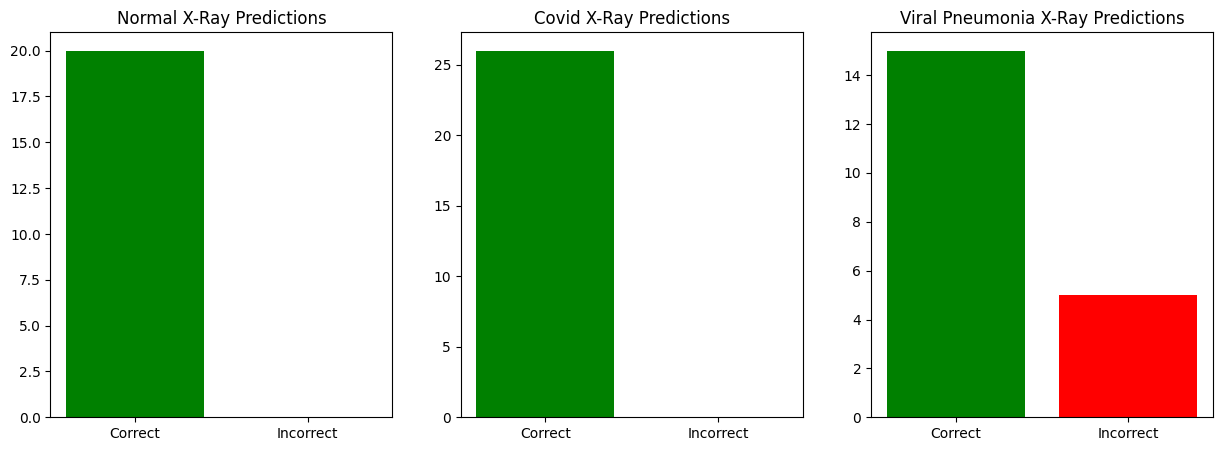

In [66]:
# matplotlib chart plot showing number of correct and incorrect predictions of normal x-rays 
number_of_correct_normal = 0
number_of_incorrect_normal = 0
number_of_correct_covid = 0
number_of_incorrect_covid = 0
number_of_correct_vp = 0
number_of_incorrect_vp = 0
for i, j in zip(true_y_cat, y_hat_cat):
    if i == j:
        if i == 'Normal':
            number_of_correct_normal += 1
        elif i == 'Covid':
            number_of_correct_covid += 1
        else:
            number_of_correct_vp += 1
    else:
        if i == 'Normal':
            number_of_incorrect_normal += 1
        elif i == 'Covid':
            number_of_incorrect_covid += 1
        else:
            number_of_incorrect_vp += 1

plt.figure(figsize = (15, 5))

# matplotlib chart plot showing number of correct and incorrect predictions of covid x-rays
plt.subplot(1, 3, 2)
plt.bar('Correct', number_of_correct_covid, color = 'green')
plt.bar('Incorrect', number_of_incorrect_covid, color = 'red')
plt.title('Covid X-Ray Predictions')
# plt.show()

plt.subplot(1, 3, 1)
plt.bar('Correct', number_of_correct_normal, color = 'green')
plt.bar('Incorrect', number_of_incorrect_normal, color = 'red')
plt.title('Normal X-Ray Predictions')
# plt.show()

# matplotlib chart plot showing number of correct and incorrect predictions of viral pneumonia x-rays
plt.subplot(1, 3, 3)
plt.bar('Correct', number_of_correct_vp, color = 'green')
plt.bar('Incorrect', number_of_incorrect_vp, color = 'red')
plt.title('Viral Pneumonia X-Ray Predictions')
plt.show()